## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1770: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet152V2 import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Main dataset'
valid_path = '/content/drive/MyDrive/Cotton Leaf Disease/test'


In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




234545216/234545216 [==============================] - 9s 0us/step


In [11]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [12]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Main dataset/*')

In [13]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [15]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3501 images belonging to 6 classes.


In [19]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 6 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-20-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
110/110 [==============================] - 2272s 20s/step - loss: 2.0388 - accuracy: 0.8263 - val_loss: 0.1225 - val_accuracy: 0.9750
Epoch 2/20
110/110 [==============================] - 1808s 16s/step - loss: 0.6854 - accuracy: 0.9289 - val_loss: 0.3139 - val_accuracy: 0.9583
Epoch 3/20
110/110 [==============================] - 1794s 16s/step - loss: 0.4962 - accuracy: 0.9494 - val_loss: 0.0426 - val_accuracy: 0.9833
Epoch 4/20
110/110 [==============================] - 1772s 16s/step - loss: 0.4308 - accuracy: 0.9623 - val_loss: 0.0142 - val_accuracy: 0.9917
Epoch 5/20
110/110 [==============================] - 1772s 16s/step - loss: 0.4191 - accuracy: 0.9609 - val_loss: 3.0729e-04 - val_accuracy: 1.0000
Epoch 6/20
110/110 [==============================] - 1797s 16s/step - loss: 0.3986 - accuracy: 0.9674 - val_loss: 0.1299 - val_accuracy: 0.9917
Epoch 7/20
110/110 [==============================] - 1797s 16s/step - loss: 0.4186 - accuracy: 0.9717 - val_loss: 0.0394 - va

In [21]:
import matplotlib.pyplot as plt

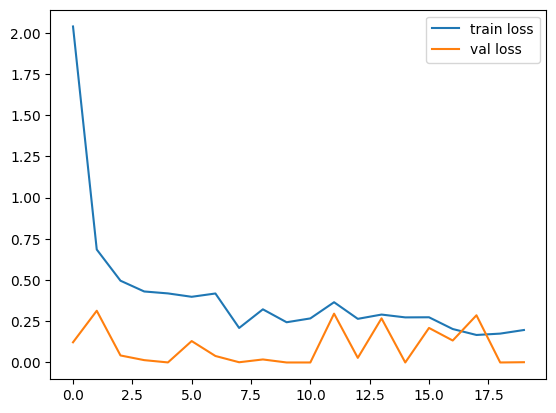

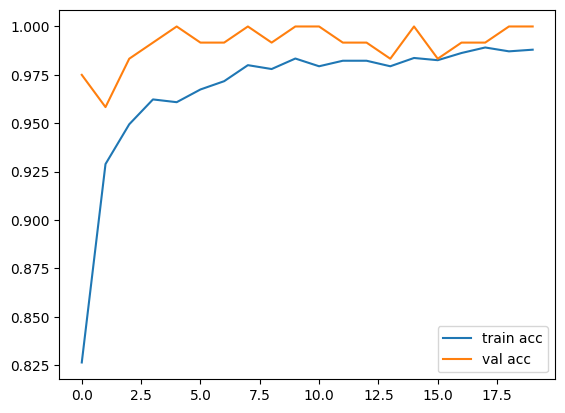

<Figure size 640x480 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet152V2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:

y_pred = model.predict(test_set)


4/4 [==============================] - 60s 13s/step


In [25]:
y_pred

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 9.99999940e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.99999940e-01],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.99999940e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.99999940e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.73343215e-35, 9.99999940e-01, 0.00000000e+00,
        9.46362210e-38, 0.00000000e+00],
       [1.99043084e-29, 9.64339882e-37, 0.00000000e+00, 1.99920404e-37,
        0.00000000e+00, 

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([5, 1, 5, 5, 2, 4, 2, 2, 5, 2, 3, 1, 3, 4, 4, 1, 0, 5, 5, 2, 0, 0,
       0, 4, 2, 2, 4, 4, 0, 0, 0, 4, 3, 5, 0, 2, 5, 2, 1, 4, 1, 3, 4, 5,
       0, 5, 3, 0, 0, 2, 5, 1, 5, 2, 3, 1, 3, 3, 1, 3, 2, 2, 4, 4, 3, 2,
       1, 4, 1, 1, 3, 0, 4, 0, 3, 1, 2, 5, 5, 1, 4, 0, 5, 2, 4, 3, 1, 0,
       3, 1, 0, 3, 2, 3, 0, 3, 1, 2, 5, 0, 5, 1, 4, 2, 1, 3, 3, 4, 3, 0,
       4, 2, 4, 1, 4, 0, 1, 5, 5, 5])

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img_data

In [ ]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__